In [1]:
import spacy

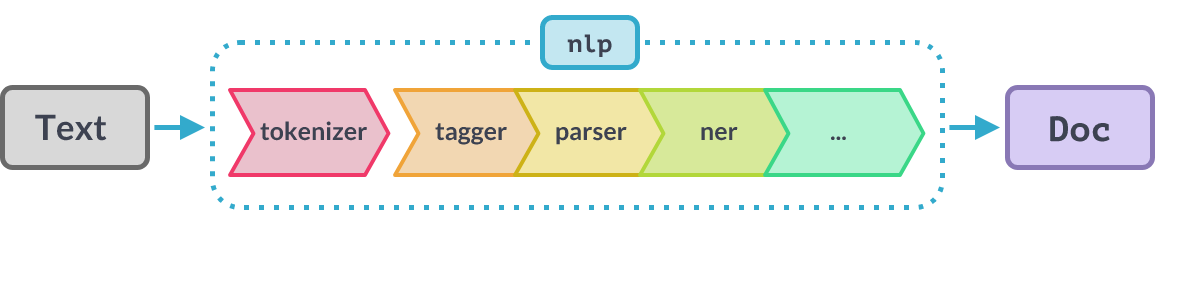

# Classic tokenizer

In [132]:
from spacy.lang.it.examples import sentences 

nlp = spacy.load("it_core_news_sm")
doc = nlp(sentences[0])
print(doc.text)
print(f"{'text':{8}} {'TAG':{6}} {'POS explained':{20}}")
for token in doc:
    print(f'{token.text:{8}} {token.tag_:{6}} {spacy.explain(token.pos_):{20}}')
    #print(token.text, token.tag_, token.dep_)

Apple vuole comprare una startup del Regno Unito per un miliardo di dollari
text     TAG    POS explained       
Apple    SP     verb                
vuole    VM     auxiliary           
comprare V      verb                
una      RI     determiner          
startup  S      noun                
del      E_RD   adposition          
Regno    SP     proper noun         
Unito    SP     proper noun         
per      E      adposition          
un       RI     determiner          
miliardo S      noun                
di       E      adposition          
dollari  S      noun                


In [ ]:
# custom

In [7]:
# Construction 1
from spacy.tokenizer import Tokenizer
from spacy.lang.it import Italian
nlp = Italian()

# Creating a blank Tokenizer with just the Italian vocab
tokenizer = Tokenizer(nlp.vocab)
tokens = tokenizer("noi andammo all'aria aperta a giocare a La Spezia")
print("Blank tokenizer",end=" : ")
for token in tokens:
    print(token,end=', ')
 
# Construction 2
from spacy.lang.it import Italian
nlp = Italian()

# Creating a Tokenizer with the default settings for Italian
tokenizer = nlp.tokenizer
tokens = tokenizer("noi andammo all'aria aperta a giocare a La Spezia")
print("\nDefault tokenizer",end=' : ')
for token in tokens:
    print(token,end=', ')

Blank tokenizer : noi, andammo, all'aria, aperta, a, giocare, a, La, Spezia, 
Default tokenizer : noi, andammo, all', aria, aperta, a, giocare, a, La, Spezia, 

# Adding special case

In [10]:
from spacy.symbols import ORTH
nlp = spacy.load("it_core_news_sm")
doc = nlp("noi andammo all'aria aperta a giocare a casarossi")  # phrase to tokenize
print("Normal tokenization : ",end=' ')
for token in doc:
    print(token,end=', ')

special_case = [{ORTH: "casa"}, {ORTH: "rossi"}]                # Adding special case rule
nlp.tokenizer.add_special_case("casarossi", special_case)
doc = nlp("noi andammo all'aria aperta a giocare a casarossi")

print("\nSpecial case tokenization : ",end=' ')
for token in doc:      # Checking new tokenization
    print(token,end=', ')

Normal tokenization :  noi, andammo, all', aria, aperta, a, giocare, a, casarossi, 
Special case tokenization :  noi, andammo, all', aria, aperta, a, giocare, a, casa, rossi, 

# Debugging special case

In [12]:
text = "noi andammo all'aria aperta a giocare a casarossi"
doc = nlp(text)
tok_exp = nlp.tokenizer.explain(text)

for t in tok_exp:
    print(t[1], "\t", t[0])

noi 	 TOKEN
andammo 	 TOKEN
all' 	 TOKEN
aria 	 TOKEN
aperta 	 TOKEN
a 	 TOKEN
giocare 	 TOKEN
a 	 TOKEN
casa 	 SPECIAL-1
rossi 	 SPECIAL-2


# Custom tokenizer

In [29]:
import re
import spacy
from spacy.tokenizer import Tokenizer

special_cases = {"<3": [{"ORTH": "<3"}], ":)": [{"ORTH": ":)"}]}
prefix_re = re.compile(r'''^[\[\*("']''')
suffix_re = re.compile(r'''[\]\)"']$''')
infix_re = re.compile(r'''[-~]''')
simple_url_re = re.compile(r'''^https?://''')

def custom_tokenizer(nlp):
    return Tokenizer(nlp.vocab, rules=special_cases,
                                prefix_search=prefix_re.search,
                                suffix_search=suffix_re.search,
                                infix_finditer=infix_re.finditer,
                                url_match=simple_url_re.match)

nlp = spacy.load("it_core_news_sm")
nlp.tokenizer = custom_tokenizer(nlp)
doc = nlp("*sto-male' <3")
print([t.text for t in doc]) 

['*', 'sto', '-', 'male', "'", '<3']


In [25]:
# adding suffix 

In [51]:
from spacy.lang.it import Italian
import spacy

nlp = Italian()
text = " oggi+ 100$ ."
doc = nlp(text)

print("Default tokenized text",end=' : ')
for token in doc:
    print(token,end=', ')

suffixes = nlp.Defaults.suffixes + [r"\-|\+|\$",]
suffix_regex = spacy.util.compile_suffix_regex(suffixes)
nlp.tokenizer.suffix_search = suffix_regex.search

print('\nText after adding suffixes', end=' : ')
doc = nlp(text)
for token in doc:
    print(token,end=', ')

Default tokenized text :  , oggi+, 100, $, ., 
Text after adding suffixes :  , oggi, +, 100, $, ., 

In [52]:
# removing characters

In [82]:
from spacy.lang.it import Italian
nlp = Italian()
text = " decremento (oggi) 100$."
doc = nlp(text)

print("Default tokenized text",end=' : ')
for token in doc:
    print(token,end=', ')

suffixes = list(nlp.Defaults.suffixes)
suffixes.remove('\\)')
suffix_regex = spacy.util.compile_suffix_regex(suffixes)
nlp.tokenizer.suffix_search = suffix_regex.search

print('\nText after removing suffixes', end=' : ')
doc = nlp(text)
for token in doc:
    print(token,end=', ')

Default tokenized text :  , decremento, (, oggi, ), 100$., 
Text after removing suffixes :  , decremento, (, oggi), 100$., 

In [85]:
#exercise prefix

In [87]:
# define our own class of Tokenization

In [88]:
import spacy
from spacy.tokens import Doc

class WhitespaceTokenizer:
    def __init__(self, vocab):
        self.vocab = vocab

    def __call__(self, text):
        words = text.split(".")
        return Doc(self.vocab, words=words)

nlp = spacy.blank("it")
nlp.tokenizer = WhitespaceTokenizer(nlp.vocab)
doc = nlp("Non.ce.lo.dicono")
print([token.text for token in doc])

['Non', 'ce', 'lo', 'dicono']


# Merging token 

In [91]:
nlp = spacy.load("it_core_news_sm")

doc = nlp("Io vivo a La Spezia")
print("Before:", [token.text for token in doc])

with doc.retokenize() as retokenizer:
    retokenizer.merge(doc[3:5], attrs={"LEMMA": "La Spezia"})
print("After:", [token.text for token in doc])

Before: ['Io', 'vivo', 'a', 'La', 'Spezia']
After: ['Io', 'vivo', 'a', 'La Spezia']


# Splitting tokens

In [97]:
from spacy import displacy

nlp = spacy.load("it_core_news_sm")
doc = nlp("il DucatiMonster é incredibile")
print("Before:", [token.text for token in doc])

with doc.retokenize() as retokenizer:
    heads = [(doc[1], 0), (doc[1], 1)]
    retokenizer.split(doc[1], ["Ducati", "Monster"], heads=heads)
print("After:", [token.text for token in doc])

Before: ['il', 'DucatiMonster', 'é', 'incredibile']
After: ['il', 'Ducati', 'Monster', 'é', 'incredibile']


# Sentence tokenization

In [109]:
import spacy

nlp = spacy.load("it_core_news_sm")
doc = nlp("Frase 1. Frase 2.")
print(doc.has_annotation("SENT_START"))

for sent in doc.sents:
    print(sent.text)

True
Frase 1.
Frase 2.


In [110]:
# custom sentence

In [112]:
from spacy.language import Language
text = "non ce lo dicono...guarda..."

nlp = spacy.load("it_core_news_sm")
doc = nlp(text)
print("Before:", [sent.text for sent in doc.sents])

@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == "...":
            doc[token.i + 1].is_sent_start = True
    return doc

nlp.add_pipe("set_custom_boundaries", before="parser")
doc = nlp(text)
print("After:", [sent.text for sent in doc.sents])

Before: ['non ce lo dicono...guarda...']
After: ['non ce lo dicono...', 'guarda...']


# STOPWORDS 

In [115]:
it = spacy.load('it_core_news_sm')
stopwords = it.Defaults.stop_words

print(len(stopwords))
print(stopwords)

608
{'farebbe', 'su', 'coll', 'facessero', 'facevano', 'nondimeno', 'fece', 'foste', 'assai', 'fummo', 'persino', 'avrebbe', 'facevi', 'quelli', 'mia', 'qualunque', 'stessi', 'tutta', 'queste', 'ma', 'ancora', 'starà', 'oltre', 'ora', 'dai', 'avuta', 'ed', 'noi', 'vari', 'sembra', 'volta', 'ha', 'quale', 'eri', 'però', 'fare', 'scopo', 'seguente', 'insieme', 'mosto', 'cento', 'torino', 'avrà', 'vostre', 'saro', 'fatto', 'moltissimo', 'siate', 'dove', 'avevo', 'certa', 'stessa', 'principalmente', 'avevi', 'conclusione', 'dice', 'adesso', 'sia', 'lavoro', 'esser', 'mezzo', 'faceva', 'perché', 'circa', 'ciascuno', 'vale', 'stando', 'ore', 'seguito', 'chicchessia', 'avuti', 'parecchi', 'sulle', 'varia', 'dell', 'gruppo', 'più', 'tempo', 'faceste', 'farò', 'aveste', 'avanti', 'visto', 'durante', 'uguali', 'qui', 'sara', 'nuovo', 'sta', 'avemmo', 'favore', 'esse', 'avranno', 'alcuno', 'stavate', 'mancanza', 'giorni', 'no', 'avessero', 'inoltre', 'tue', 'malissimo', 'cogli', 'governo', 'avute

In [118]:
text = nlp("siamo andati dal fabbro per il cancello")
for token in text:
    print(token.text,token.is_stop)

siamo True
andati False
dal True
fabbro False
per True
il True
cancello False


In [ ]:
#exercise: eliminate stopwords

In [122]:
text = "ma dai, il diritto di recesso non viene esercitato in tempo"

In [123]:
import spacy
#loading the english language small model of spacy
it = spacy.load('it_core_news_sm')
stopwords = it.Defaults.stop_words

lst=[]
for token in text.split():
    if token.lower() not in stopwords:    #checking whether the word is not 
        lst.append(token)                    #present in the stopword list.
        
#Join items in the list
print("Original text  : ",text)
print("Text after removing stopwords  :   ",' '.join(lst))

Original text  :  ma dai, il diritto di recesso non viene esercitato in tempo
Text after removing stopwords  :    dai, diritto recesso viene esercitato


In [121]:
# custom stopwords

In [124]:
nlp.Defaults.stop_words.add("dai") # adding one word

In [125]:
nlp.Defaults.stop_words |= {"ma","dai"} # adding several words

In [126]:
nlp.Defaults.stop_words.remove("dai") # remove one word

In [ ]:
nlp.Defaults.stop_words -= {"ma", "dai"} # remove several words

# LEMMATISATION

In [150]:
from spacy.lang.it.examples import sentences 

nlp = spacy.load("it_core_news_sm")
doc = nlp(sentences[0])
print(doc.text)
print(f"{'text':{8}} {'TAG':{6}} {'POS explained':{20}} {'lemma':{8}}")
for token in doc:
    print(f'{token.text:{8}} {token.tag_:{6}} {spacy.explain(token.pos_):{20}} {token.lemma_:{8}}')
    #print(token.text, token.tag_, token.dep_)

Apple vuole comprare una startup del Regno Unito per un miliardo di dollari
text     TAG    POS explained        lemma   
Apple    SP     verb                 Apple   
vuole    VM     auxiliary            volere  
comprare V      verb                 comprare
una      RI     determiner           una     
startup  S      noun                 startup 
del      E_RD   adposition           del     
Regno    SP     proper noun          Regno   
Unito    SP     proper noun          Unito   
per      E      adposition           per     
un       RI     determiner           un      
miliardo S      noun                 miliardo
di       E      adposition           di      
dollari  S      noun                 dollaro 


# STEMMING 

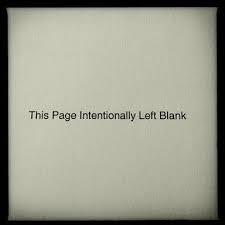

# POS tagging 

In [133]:
from spacy.lang.it.examples import sentences 

nlp = spacy.load("it_core_news_sm")
doc = nlp(sentences[0])
print(doc.text)
print(f"{'text':{8}} {'TAG':{6}} {'POS explained':{20}}")
for token in doc:
    print(f'{token.text:{8}} {token.tag_:{6}} {spacy.explain(token.pos_):{20}}')
    #print(token.text, token.tag_, token.dep_)

Apple vuole comprare una startup del Regno Unito per un miliardo di dollari
text     TAG    POS explained       
Apple    SP     verb                
vuole    VM     auxiliary           
comprare V      verb                
una      RI     determiner          
startup  S      noun                
del      E_RD   adposition          
Regno    SP     proper noun         
Unito    SP     proper noun         
per      E      adposition          
un       RI     determiner          
miliardo S      noun                
di       E      adposition          
dollari  S      noun                


In [134]:
# counting 

In [135]:
import spacy

nlp = spacy.load("it_core_news_sm")
doc = nlp(sentences[0])

# Counting the frequencies of different POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
print(POS_counts)

for k,v in sorted(POS_counts.items()):
    print(f'{k:{4}}. {doc.vocab[k].text:{5}}: {v}')

{100: 2, 87: 1, 90: 2, 92: 3, 85: 3, 96: 2}
  85. ADP  : 3
  87. AUX  : 1
  90. DET  : 2
  92. NOUN : 3
  96. PROPN: 2
 100. VERB : 2


In [142]:
# display PoS 

In [143]:
import spacy
from spacy import displacy

nlp = spacy.load("it_core_news_sm")
doc = nlp("Marco mangia la mela rossa")
displacy.serve(doc, style="dep")

/home/mypc/.local/lib/python3.8/site-packages/spacy/displacy/__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [146]:
import spacy
from spacy import displacy

nlp = spacy.load("it_core_news_sm")
doc = nlp("Marco mangia la mela rossa")
options = {'distance': 110, 'compact': 'True', 'color': 'yellow', 'bg': '#09a3d5', 'font': 'Times'}

displacy.serve(doc, style="dep",options=options)


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
